## CAPSTONE PROJECT: BATTLE OF THE NEIGHBOURS HOVEDSTADEN-PARKS,COPENHAGEN

This is notebook is a showcase for the skillset come with using applied daat science capstone project to solve  real world problems like determining the a ideal park allocation, in  order to complete a Coursera IBM Data Science Specialization. The notebook shall exhibit skills :-
1. Extensive use of python libraries, 
2. Python language use and defining custom functions, 
3. SQL when needed, 
4. Data visualization and manipulation 
5. Use of Github for version control
6. Various Datasets usecases

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis & Evaluation](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)
* [Reference](#reference)

## <a name="introduction"></a>Introduction: Business Problem

This project will suffice as a reference for Greener and enviromnetally aware stakeholders interested in identifying and **optimal locale segmentation** of parks for **outdoor recreational service providers or entrepreneurs**in parks in the central region of Denmark** 

**Hypothetical Business problem:**
The local authorities & Danish government as greener environment stakeholders would like to identify the most ideal way to segment Denmark's Central region parks and allocate them in an efficient way to outdoor recreational service prviders and entrepreneurs who are interested in bidding for service provision in various sub-areas in the region. The stakeholders have assigned the data scientists at ugandane with a task to offer them a **final deliverable** addressing their **business problem.**

<h4><center> Copenhagen, Greater Copenhagen & Central Region of Denmark </center></h4>
Copenhagen is a green city well endowed with open spaces. It has an extensive and well-distributed system of parks that act as venues for a wide array of events and urban life. As a supplement to the regular parks, there are a number of congenial public gardens and some cemeteries doubling as parks. It is official municipal policy in Copenhagen that all citizens by 2015 must be able to reach a park or beach on foot in less than 15 minutes. (https://en.wikipedia.org/wiki/Parks_and_open_spaces_in_Copenhagen).

Copenhagen is the capital city of Denmark, a strategic harbour and the largest city in Denmark, and thus the most densey populated area in the country. Many people prefer to inhabit the greater Copenhagen areas also known as **Hovedstaden or the capital region of Denmark**  which will be our Borough on **Zealand( Sjaelland) island**; Denmark's largest island. There are many parks on Zealand, which we will view in our quest for a clustering model to **find similar areas** based on neighborhoods.

We will use data science tools to fetch the raw data, visualize it then **generate clusters of parks in the region based on above criteria**. We will analyse the best ways to segment the parks, so that **stakeholders can make the final decision** based on the analysis.

## <a name="data"></a>Data

Based on the definition of our problem, factors that may impact our decision are:
* Location
* Number of existing parks in the neighborhood and nearby
In this project, we will fetch or extract data from the following data sources:
* The hovedstaden region data as our borough of choice data could be gotten readily at https://simplemaps.com/data/dk-cities
* Park data in every neighborhood will be obtained using **Foursquare API**
* Coordinates of Hovedstaden will be obtained using **Nominatim Geocoder** 

The location data will further be cleaned to only consider the latitudes and longitudes,borough and neighborhoods in the central region of Denmark.   

##### Importing libraries 

In [1]:
import pandas as pd # for data analysis
# to reveal the entire dataframe in its entirity
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 
import numpy as np # for data vector handling
import requests # to process website data
import xlrd # to read excel files
import csv #to read csv
import json
import seaborn as sns
#installing geopy
!pip install geopy 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# yellow brick is ideal for model evaluation visualisation
!pip install yellowbrick
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors 
%matplotlib inline 
# import k-means from clustering stage
from sklearn.cluster import KMeans 
#installing folium
!pip install folium==0.5.0 
import folium # map rendering library 
print ('Libraries imported!') 
#Note: warehouse Id on foursquare is  on  52e81612bcbc57f1066b7a36

Libraries imported!


##### Data Collection: Reading the data from https://simplemaps.com/data/dk-cities 

Based on a web search, we were able to find a realiable source of data for the  denmarks, cities latitudes and longitudes from the highlighted website. we downloaded the data as an excel worksheet and read it in into the notebook

In [2]:
excel_file = 'dk.xlsx'
xls = pd.read_excel(excel_file)
xls.head(4)

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Copenhagen,55.6786,12.5635,Denmark,DK,Hovedstaden,primary,1085000.0,1085000.0
1,Aarhus,56.1572,10.2107,Denmark,DK,Midtjylland,minor,237551.0,227100.0
2,Odense,55.4004,10.3833,Denmark,DK,Syddanmark,minor,158222.0,145931.0
3,Aalborg,57.0337,9.9166,Denmark,DK,Nordjylland,admin,122219.0,101616.0


##### Data Cleaning
we will have to rename the columns and drop unnecessary columns, whose data we cannot obtain, given the tiem and budget. but can however be further leveraged upon in other data science projects wghere it may be essential.  

In [3]:
#rename latitude and longitude columns,
old=['city', 'lat','lng', 'admin_name']
new=['Neighborhood','Latitude','Longitude', 'Borough']
xls.rename(columns=dict(zip(old, new)), inplace=True)
#drop irrelevant columns
xls = xls.drop(['country','iso2','capital','population','population_proper'],1)
# or use xls = xls.drop(xls.columns[[3, 4, 6, 7,8]], axis=1)
xls.head()

,Neighborhood,Latitude,Longitude,Borough
0,Copenhagen,55.6786,12.5635,Hovedstaden
1,Aarhus,56.1572,10.2107,Midtjylland
2,Odense,55.4004,10.3833,Syddanmark
3,Aalborg,57.0337,9.9166,Nordjylland
4,Esbjerg,55.4670,8.4500,Syddanmark


We will consider only Hovedstaden: The Capital Region of Denmark 

In [4]:
#We take the municipalities within the Capital Region Of Denmark
df_cop= xls[xls['Borough'].str.contains("Hovedstaden")].reset_index(drop=True) 
df_cop

,Neighborhood,Latitude,Longitude,Borough
0,Copenhagen,55.6786,12.5635,Hovedstaden
1,Hillerød,55.9333,12.3167,Hovedstaden
2,Frederiksberg,55.6785,12.5221,Hovedstaden
3,Søborg,55.7302,12.5098,Hovedstaden
4,Hvidovre,55.6503,12.4758,Hovedstaden
5,Rødovre,55.6827,12.4644,Hovedstaden
6,Charlottenlund,55.7537,12.5918,Hovedstaden
7,Helsingør,56.0294,12.5863,Hovedstaden
8,Herlev,55.7235,12.4404,Hovedstaden
9,Kongens Lyngby,55.7718,12.5060,Hovedstaden


##### Data Exploration & Visualization
 We use the Geolocator to locate copenhagens latitudes and longitudes so as to visualise the central region of Denmark (Hovedstaden)

In [5]:
address = 'Copenhagen, CPH' 
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
cph_lat = location.latitude
cph_long = location.longitude
print('The geographical coordinates of Copenhagen are {}, {}.'.format(cph_lat, cph_long)) 

The geographical coordinates of Copenhagen are 55.7002772, 12.5523982.


In [6]:
# create map of Toroonto using latitude and longitude values
map_hovedstaden = folium.Map(location=[cph_lat,cph_long], zoom_start=9) 
# add markers to map
for lat, lng, borough, neighborhood in zip(df_cop['Latitude'], df_cop['Longitude'], df_cop['Borough'], df_cop['Neighborhood']):
   label = '{}, {}'.format(neighborhood, borough)
   label = folium.Popup(label, parse_html=True)
   folium.CircleMarker(
       [lat, lng],
       radius=5,
       popup=label,
       color='blue',
       fill=True,
       fill_color='#3186cc',
       fill_opacity=0.7,
       parse_html=False).add_to(map_hovedstaden)  
   
map_hovedstaden

###### Four Square Credentials

In [7]:
#FOURSQUARE API CREDENTIALS
CLIENT_ID ='KXWFKHV31RVPPPK1VROSORH4UXLDSVXZWPKTKGQQCC5RQP2Y' # your Foursquare ID
CLIENT_SECRET ='JACQP503NWLEWBFOTPMUQ2FQLT3JTF1FWVNADUA1OKA34LHR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT= 25000 # A default Foursquare API limit value
TOKEN='LCX5WFKJUQRLTVHGTAKL5Y01HLGJ3RXS0K1HC0LLCVJBV01J'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KXWFKHV31RVPPPK1VROSORH4UXLDSVXZWPKTKGQQCC5RQP2Y
CLIENT_SECRET:JACQP503NWLEWBFOTPMUQ2FQLT3JTF1FWVNADUA1OKA34LHR


###### Defining Function to get venues

In [8]:
# note a big radius can cause an error
def getVenues(names, latitudes, longitudes, radius=3000):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)    
       # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
           CLIENT_ID, 
           CLIENT_SECRET, 
           VERSION, 
           lat, 
           lng, 
           radius, 
           LIMIT)
           
       # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
       
       # return only relevant information for each nearby venue
        venues_list.append([( 
           name, 
           lat, 
           lng, 
           v['venue']['name'], 
           v['venue']['location']['lat'], 
           v['venue']['location']['lng'],  
           v['venue']['categories'][0]['name']) for v in results]) 
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                 'Neighborhood Latitude', 
                 'Neighborhood Longitude', 
                 'Venue', 
                 'Venue Latitude', 
                 'Venue Longitude', 
                 'Venue Category'] 
    return(nearby_venues)

In [9]:
names=df_cop['Neighborhood']
lat=df_cop['Latitude']
lon=df_cop['Longitude']
query='hotel'                            
drk_venues =getVenues(names, lat, lon)  

Copenhagen
Hillerød
Frederiksberg
Søborg
Hvidovre
Rødovre
Charlottenlund
Helsingør
Herlev
Kongens Lyngby
Ballerup
Taastrup
Vallensbæk Strand
Glostrup
Brøndby
Frederiksværk
Dragør
Albertslund
Hørsholm
Frederikssund
Ishøj
Rønne
Allerød
Farum
Holte
Kokkedal
Kastrup
Helsinge
Stenløse


In [10]:
drk_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Copenhagen,55.6786,12.5635,Ørstedsparken,55.680670,12.566367,Park
1,Copenhagen,55.6786,12.5635,Ørsted Ølbar,55.681217,12.564578,Beer Bar
2,Copenhagen,55.6786,12.5635,Boghallen,55.676788,12.568395,Bookstore
3,Copenhagen,55.6786,12.5635,Imperial,55.675365,12.561041,Movie Theater
4,Copenhagen,55.6786,12.5635,Høst,55.683279,12.566076,Scandinavian Restaurant


In [11]:
print('There are over there are over {} venues'.format(drk_venues.shape[0]))

There are over there are over 1411 venues


##### Are there any Parks ?

In [12]:
'Park' in drk_venues['Venue Category'].unique()

True

In [13]:
drk_venues['Venue Category'].value_counts()['Park']

36

##### How many venues per neighbourhood?

In [14]:
drk_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Albertslund,49,49,49,49,49,49
Allerød,14,14,14,14,14,14
Ballerup,20,20,20,20,20,20
Brøndby,46,46,46,46,46,46
Charlottenlund,97,97,97,97,97,97
Copenhagen,100,100,100,100,100,100
Dragør,37,37,37,37,37,37
Farum,21,21,21,21,21,21
Frederiksberg,100,100,100,100,100,100


##### How many unique venues & categories are there in the region

In [15]:
print('There are {} uniques categories.'.format(len(drk_venues['Venue Category'].unique())))

There are 202 uniques categories.


In [16]:
print("The unique venue categories include but arent limited to:", drk_venues['Venue Category'].unique())

The unique venue categories include but arent limited to: ['Park' 'Beer Bar' 'Bookstore' 'Movie Theater' 'Scandinavian Restaurant'
 'Cocktail Bar' 'Pizza Place' 'Theme Park' 'Hotel' 'Food Court'
 'Coffee Shop' 'Creperie' 'Comic Shop' 'Café' 'Gaming Cafe'
 'Breakfast Spot' 'Plaza' 'Gift Shop' 'Concert Hall' 'Wine Shop'
 'Indie Movie Theater' 'Furniture / Home Store' 'Botanical Garden'
 'Spanish Restaurant' 'Wine Bar' 'Playground' 'Toy / Game Store' 'Gym'
 'Bakery' 'Palace' 'Music Store' 'Garden' 'Library' 'Pier' 'Beer Garden'
 'Theater' 'Capitol Building' 'Yoga Studio' 'Pub' 'Sushi Restaurant'
 'Health & Beauty Service' 'Seafood Restaurant' 'Art Museum' 'Beer Store'
 'African Restaurant' 'Falafel Restaurant' 'Cemetery' 'Harbor / Marina'
 'Burger Joint' 'French Restaurant' 'Kebab Restaurant' 'Deli / Bodega'
 'Thai Restaurant' 'Music Venue' 'Farm' 'Italian Restaurant'
 'Historic Site' 'Grocery Store' 'Steakhouse' 'Ice Cream Shop'
 'Shopping Mall' 'Gym / Fitness Center' 'Convenience Store'

## Methodology <a name="methodology"></a>

The **business purpose** of this project is **to find the best way to segment the green parks in the central region of Denmark(Hovedstaden**) as a fundamental step towards allocating park recreation &  maintenance services by the local authorities and Government .

Now we retrieved the following data:  

1. **All location data** of all the neighbourhoods in the central region of Denamrk
2. **All Venues data** in the Central region of Denmark

The **CRISP DM** methodology is adopted throughout the project as the datascience standard and best in class approach

#### Assumptions and Limitations
 * The radius was limited to **2000** to avoid duplication of venues and limit to **25000** are wide so we can cover as many venues as posible per neighbourhood
 * Due to time and budget constraints, other demographics were not taken into consideration, but can be used to further improve on the clustering to determine allocation
 * Park distribution is subject to the Danish government and Local authorities' planning as Denmark priritises **green cities**
 * Parks are by default to be developed within 15 minutes of each bloock in populated areas like hubs,cities or town
 
In the final step, we will focus on the best way to segment the parks and we will also present the candidate clusters in the map view for stakeholders to make the final decision based on our deliverable.

## Analysis & Evaluation <a name="analysis"></a>

##### Data Analysis of Each Neighbourhood 
We had to **feature engineer** the data using **one hot encoding**  to leverage on **machine learning algorithms, K means** to be precise to cluster the Parks as per neighborhood

##### One hot Encoding : Feature engineering for K Means 

In [17]:
# one hot encoding
drk_onehot = pd.get_dummies(drk_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
drk_onehot['Neighborhood'] = drk_venues['Neighborhood'] 

# move neighborhood column to the first column
fix_columns = [drk_onehot.columns[-1]] + list(drk_onehot.columns[:-1])
drk_onehot = drk_onehot[fix_columns]

print(drk_onehot.shape)
drk_onehot.head()

(1411, 203)


,Neighborhood,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Bathing Area,Beach,Beer Bar,Beer Garden,Beer Store,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Bus Station,Business Service,Butcher,Cafeteria,Café,Camera Store,Campground,Canal,Candy Store,Capitol Building,Car Wash,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Comic Shop,Community Center,Concert Hall,Convenience Store,Convention Center,Creperie,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dog Run,Dumpling Restaurant,Electronics Store,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,French Restaurant,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,General Entertainment,Gift Shop,Golf Course,Government Building,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hockey Rink,Hostel,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Italian Restaurant,Juice Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Molecular Gastronomy Restaurant,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nightclub,Office,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Outlet Store,Palace,Park,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Racetrack,Ramen Restaurant,Rental Car Location,Restaurant,Rock Club,Sandwich Place,Scandinavian Restaurant,Science Museum,Seafood Restaurant,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Snack Place,Soccer Field,Soccer Stadium,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Toy / Game Store,Track,Trail,Train,Train Station,Turkish Restaurant,Vietnamese Restaurant,Volleyball Court,Water Park,Wine Bar,Wine Shop,Yoga Studio,Zoo,Zoo Exhibit
0,Copenhagen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Copenhagen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Copenhagen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Copenhagen,0,0,0,0,0,0,0,0,0,0,0,0,0

##### Grouping Venues  by Neigbourhood and Averaging their Frequencies
Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [18]:
# add the word='hotel|hostel|breakfast|bed & breakfast|motels|lodge|guesthouse' into one categories ?????

drk_group = drk_onehot.groupby(["Neighborhood"]).mean().reset_index()
print(drk_group.shape)
drk_group.head()

(29, 203)


,Neighborhood,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Bathing Area,Beach,Beer Bar,Beer Garden,Beer Store,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Bus Station,Business Service,Butcher,Cafeteria,Café,Camera Store,Campground,Canal,Candy Store,Capitol Building,Car Wash,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Comic Shop,Community Center,Concert Hall,Convenience Store,Convention Center,Creperie,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dog Run,Dumpling Restaurant,Electronics Store,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,French Restaurant,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,General Entertainment,Gift Shop,Golf Course,Government Building,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hockey Rink,Hostel,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Italian Restaurant,Juice Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Molecular Gastronomy Restaurant,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nightclub,Office,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Outlet Store,Palace,Park,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Racetrack,Ramen Restaurant,Rental Car Location,Restaurant,Rock Club,Sandwich Place,Scandinavian Restaurant,Science Museum,Seafood Restaurant,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Snack Place,Soccer Field,Soccer Stadium,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Toy / Game Store,Track,Trail,Train,Train Station,Turkish Restaurant,Vietnamese Restaurant,Volleyball Court,Water Park,Wine Bar,Wine Shop,Yoga Studio,Zoo,Zoo Exhibit
0,Albertslund,0.0,0.0,0.0,0.0,0.0,0.020408,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.081633,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.020408,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.040816,0.020408,0.0,0.020408,0.0,0.00,0.020408,0.020408,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00,0.020408,0.0,0.020408,0.0,0.0,0.0,0.020408,0.0,0.0,0.00,0.0,0.142857,0.000000,0.040816,0.0,0.000000,0.0,0.000000,0.020408,0.0,0.0,0.0,0.0,0.020408,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.020408,0.0,0.000000,0.0,0.0,0.000000,0.061224,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.020408,0.0,0.0,0.000000,0.040816,0.0,0.0,0.0,0.020408,0.0,0.0,0.000000,0.000000,0.0,0.0,0.020408,0.0,0.020408,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.020408,0.0,0.0,0.000000,0.040816,0.0,0.0,0.020408,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.020408,0.0,0.061224,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.020408,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.040816,0.0,0.0,0.020408,0.020408,0.0,0.0,0.0,0.0,0.0
1,Allerød,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0

Grouping the hotels for each neighborhood

In [19]:
# Lets look at the a dataframe with average frequency of hotels grouped by neighbourhood
parks = drk_group[["Neighborhood",'Park']]
parks.head() #.head() shows the first five rows only

,Neighborhood,Park
0,Albertslund,0.020408
1,Allerød,0.000000
2,Ballerup,0.000000
3,Brøndby,0.021739
4,Charlottenlund,0.051546


##### Data Modeling: Clustering neighborhoods with K Means

In [20]:
# instaintiate with K=3

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=10, random_state=1)
# we drop the neighborhood column because K means doesnot evaualte string objects
X = parks.drop(['Neighborhood'], axis=1)

In [21]:
kmeans.fit(X)
kmeans.labels_[0:10]

array([2, 1, 1, 2, 0, 0, 1, 0, 0, 1])

 ##### Define a function get the KMeans Inertia 
  To measure of how internally coherent clusters are.

In [22]:
def get_KMeaninertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=5, random_state=1)
    km.fit(X)
    return km.inertia_

#####  Data Model Evaluation 
We used the defined function for the ranges og **K(1-10)** to get the ideal Kmeans for our clusters 

In [23]:
scores = [get_KMeaninertia(x) for x in range(1, 15)]

##### Visualising the K means Elbow curve
 we visualise the **K** means to get the K with the ***lowest error*** 

Text(0, 0.5, 'Error')

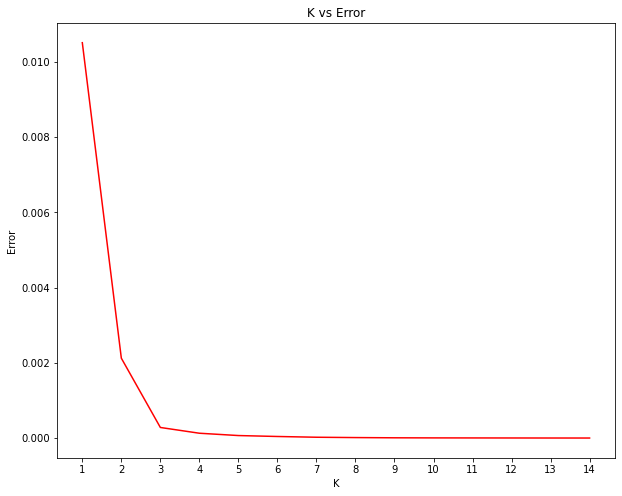

In [26]:
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(1, 15), y=scores, color='r')
plt.title("K vs Error")
plt.xticks(range(1, 15))
plt.xlabel("K")
plt.ylabel("Error")

##### Visualize the best *K-value* to choose

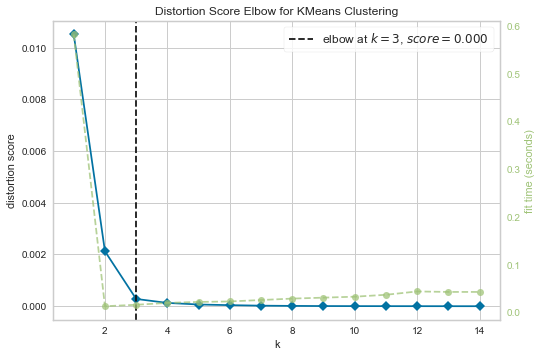

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()     

 The optimum K value **K=3** is as displayed above. We therefore  Take that as our number of cluster

In [28]:
kclusters = 3

drk_group_cluster = parks.drop('Neighborhood', 1)

# run k-means clustering
means = KMeans(n_clusters=kclusters, random_state=0).fit(drk_group_cluster)

# check cluster labels generated for each row in the dataframe
means.labels_[0:10]

array([2, 0, 0, 2, 1, 1, 0, 1, 1, 0])

##### Create a new dataframe that includes the clusters for each neighborhood.

In [29]:
drk_merge = parks.copy()

# add clustering labels
drk_merge["Cluster Labels"] = kmeans.labels_
drk_merge.head()

,Neighborhood,Park,Cluster Labels
0,Albertslund,0.020408,2
1,Allerød,0.000000,1
2,Ballerup,0.000000,1
3,Brøndby,0.021739,2
4,Charlottenlund,0.051546,0


##### Merge drk_merge with drk_data to add latitude/longitude for each neighborhood and output shape and few lines 

In [30]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
drk_merge = drk_merge.join(drk_venues.set_index("Neighborhood"), on="Neighborhood")

print(drk_merge.shape)
drk_merge.head()

(1411, 9)


,Neighborhood,Park,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Albertslund,0.020408,2,55.6623,12.3351,Sallie's,55.660134,12.328606,American Restaurant
0,Albertslund,0.020408,2,55.6623,12.3351,Wittrup Motel,55.660175,12.328611,Hotel
0,Albertslund,0.020408,2,55.6623,12.3351,Lille Tilde,55.643440,12.345483,Outdoor Sculpture
0,Albertslund,0.020408,2,55.6623,12.3351,Forbrændingen,55.657805,12.356543,Music Venue
0,Albertslund,0.020408,2,55.6623,12.3351,Kvicly Albertslund,55.656866,12.352714,Market


##### Sort the results by Cluster Labels

In [31]:
# sort the results by Cluster Labels
drk_merge.sort_values(["Cluster Labels"], inplace=True)
drk_merge.head(10)

,Neighborhood,Park,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
28,Vallensbæk Strand,0.045455,0,55.6139,12.3895,Mågen Hundige Havn,55.595811,12.356061,Harbor / Marina
8,Frederiksberg,0.050000,0,55.6785,12.5221,Vester Vov Vov,55.671973,12.554086,Indie Movie Theater
8,Frederiksberg,0.050000,0,55.6785,12.5221,Skydebanens Legeplads,55.670213,12.553734,Playground
8,Frederiksberg,0.050000,0,55.6785,12.5221,Mikkeller & Friends,55.694605,12.543122,Beer Bar
8,Frederiksberg,0.050000,0,55.6785,12.5221,Assistens Kirkegård,55.690484,12.549813,Cemetery
8,Frederiksberg,0.050000,0,55.6785,12.5221,GRØD,55.693643,12.542740,Breakfast Spot
8,Frederiksberg,0.050000,0,55.6785,12.5221,MAD & KAFFE,55.665873,12.550339,Café
8,Frederiksberg,0.050000,0,55.6785,12.5221,Kebabistan,55.667839,12.548648,Kebab Restaurant
8,Frederiksberg,0.050000,0,55.6785,12.5221,Bowl Market Copenhagen,55.672028,12.556169,Breakfast Spot
8,Frederiksberg,0.050000,0,55.6785,12.5221,Ro Chokolade,55.692574,12.544147,Chocolate Shop


##### How many locations do we have in the venue category *Park*

In [32]:
# how many in the dataframe have the word hotel
drk_merge['Venue Category'].value_counts()['Park']

36

## Results and Discussion <a name="results"></a>

##### We see that there are a total of **??** locations in the venue category Hotel in the central region of Denmark Hovedstaden

##### Data Visualisation of Clusters from the dataframe drk_merge

In [33]:
# create map
dkmap_clusters = folium.Map(location=[cph_lat, cph_long], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(drk_merge['Neighborhood Latitude'],drk_merge['Neighborhood Longitude'], drk_merge['Neighborhood'], drk_merge['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(dkmap_clusters)
       
dkmap_clusters

##### How Many Clusters have we?

In [36]:
parks['Cluster Labels']=kmeans.labels_
parks.head(10)
parks['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)

<ipython-input-36-c1371313d16f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parks['Cluster Labels']=kmeans.labels_


,Cluster Labels
0,7
1,14
2,8


There are only **6** Clusters

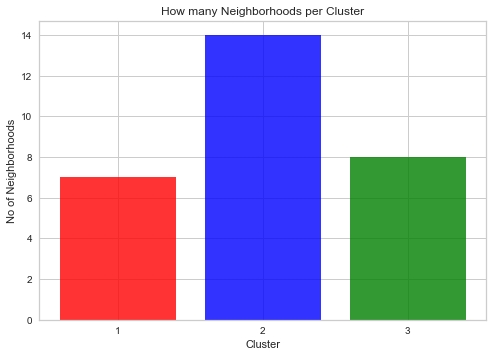

In [37]:
objects = (1,2,3)
y_pos = np.arange(len(objects))
perform= parks['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
pfrm = perform['Cluster Labels'].tolist()
plt.bar(y_pos, pfrm, align='center', alpha=0.8, color=['red', 'blue','green'])
plt.xticks(y_pos, objects)
plt.ylabel('No of Neighborhoods')
plt.xlabel('Cluster')
plt.title('How many Neighborhoods per Cluster')

plt.show()

#####  Number of neighbourhoods in Each Cluster

In [38]:
# How many neighborhoods in each cluster
parks['Cluster Labels'].value_counts()

1    14
2     8
0     7
Name: Cluster Labels, dtype: int64

#### Analysis of Each Cluster

In [39]:
# This will create a dataframe with borough of each neighborhood which we will merge with each cluster dataframe
df_new = df_cop[['Borough', 'Neighborhood']]
df_new.head()

,Borough,Neighborhood
0,Hovedstaden,Copenhagen
1,Hovedstaden,Hillerød
2,Hovedstaden,Frederiksberg
3,Hovedstaden,Søborg
4,Hovedstaden,Hvidovre


##### Cluster 1

In [40]:
### Cluster 1
cluster1 = drk_merge.loc[drk_merge['Cluster Labels'] == 0]
cluster1_df = pd.merge(df_new, cluster1, on='Neighborhood')
cluster1_df.head(12) 

,Borough,Neighborhood,Park,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hovedstaden,Copenhagen,0.04,0,55.6786,12.5635,ByOasen,55.692543,12.557376,Farm
1,Hovedstaden,Copenhagen,0.04,0,55.6786,12.5635,Pizzeria MaMeMi,55.667879,12.548200,Pizza Place
2,Hovedstaden,Copenhagen,0.04,0,55.6786,12.5635,Il Buco,55.666265,12.580132,Italian Restaurant
3,Hovedstaden,Copenhagen,0.04,0,55.6786,12.5635,Østre Anlæg,55.690238,12.580118,Park
4,Hovedstaden,Copenhagen,0.04,0,55.6786,12.5635,Osteria 16,55.667726,12.545811,Italian Restaurant
5,Hovedstaden,Copenhagen,0.04,0,55.6786,12.5635,Grød,55.671439,12.545458,Scandinavian Restaurant
6,Hovedstaden,Copenhagen,0.04,0,55.6786,12.5635,Gaarden & Gaden,55.692241,12.552130,Wine Bar
7,Hovedstaden,Copenhagen,0.04,0,55.6786,12.5635,Forno a Legna,55.682382,12.535324,Pizza Place
8,Hovedstaden,Copenhagen,0.04,0,55.6786,12.5635,Store VEGA,55.668221,12.543882,Music Venue
9,Hovedstaden,Copenhagen,0.04,0,55.6786,12.5635,Hatoba,55.668531,12.579252,Sushi Restaurant


##### Cluster 2

In [50]:
### Cluster 2
cluster2 = drk_merge.loc[drk_merge['Cluster Labels'] == 1]
cluster2_df = pd.merge(df_new, cluster2, on='Neighborhood')
cluster2_df.head(12) 

,Borough,Neighborhood,Park,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hovedstaden,Helsingør,0.0,1,56.0294,12.5863,Købmandsgården (Spar),56.005798,12.579604,Grocery Store
1,Hovedstaden,Helsingør,0.0,1,56.0294,12.5863,Fitness World,56.030375,12.606507,Gym / Fitness Center
2,Hovedstaden,Helsingør,0.0,1,56.0294,12.5863,Kasernebyen,56.037808,12.621750,Castle
3,Hovedstaden,Helsingør,0.0,1,56.0294,12.5863,Cafe Olai,56.034804,12.610257,Scandinavian Restaurant
4,Hovedstaden,Helsingør,0.0,1,56.0294,12.5863,Snekkersten Strand,56.006939,12.578021,Beach
5,Hovedstaden,Helsingør,0.0,1,56.0294,12.5863,Cafe Vitus,56.008327,12.587628,Food
6,Hovedstaden,Helsingør,0.0,1,56.0294,12.5863,Teknisk Museum,56.022208,12.562915,Science Museum
7,Hovedstaden,Helsingør,0.0,1,56.0294,12.5863,La Dolce Vita,56.037296,12.609430,Italian Restaurant
8,Hovedstaden,Helsingør,0.0,1,56.0294,12.5863,Sachi Sushi,56.035183,12.610429,Sushi Restaurant
9,Hovedstaden,Helsingør,0.0,1,56.0294,12.5863,Cafe Hyacint,56.034877,12.612225,Scandinavian Restaurant


##### Cluster 3

In [42]:
### Cluster 3
cluster3 = drk_merge.loc[drk_merge['Cluster Labels'] == 2]
cluster3_df = pd.merge(df_new, cluster3, on='Neighborhood')
cluster3_df.head(12) 

,Borough,Neighborhood,Park,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hovedstaden,Hillerød,0.028571,2,55.9333,12.3167,Jensens Bøfhus,55.933365,12.296503,Steakhouse
1,Hovedstaden,Hillerød,0.028571,2,55.9333,12.3167,"7-Eleven, Hillerød",55.927310,12.311032,Convenience Store
2,Hovedstaden,Hillerød,0.028571,2,55.9333,12.3167,Cafe Vivaldi,55.929579,12.303133,Café
3,Hovedstaden,Hillerød,0.028571,2,55.9333,12.3167,DSB Kiosk,55.927602,12.311374,Pharmacy
4,Hovedstaden,Hillerød,0.028571,2,55.9333,12.3167,FrederiksborgCentret,55.921088,12.298913,Stadium
5,Hovedstaden,Hillerød,0.028571,2,55.9333,12.3167,Føtex,55.928896,12.293450,Grocery Store
6,Hovedstaden,Hillerød,0.028571,2,55.9333,12.3167,REMA 1000,55.919977,12.290156,Discount Store
7,Hovedstaden,Hillerød,0.028571,2,55.9333,12.3167,M/F Frederiksborg,55.933409,12.303143,Boat or Ferry
8,Hovedstaden,Hillerød,0.028571,2,55.9333,12.3167,Hillerød Torv,55.929540,12.302811,Plaza
9,Hovedstaden,Hillerød,0.028571,2,55.9333,12.3167,Spisestedet Leonora,55.934537,12.299131,Café


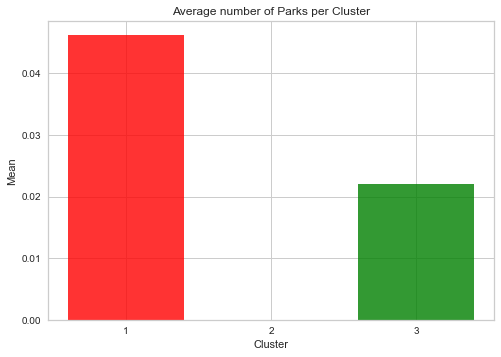

In [43]:
clusters_mean = [cluster1_df['Park'].mean(),cluster2_df['Park'].mean(), cluster3_df['Park'].mean()]
objects = (1,2,3)
y_pos = np.arange(len(objects))
perf = clusters_mean
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red','blue','green'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Parks per Cluster')

plt.show()

#### Obsevations

There are clearly more parks in areas with lesser neighborhoods.This could be partially attributed to the fact that less densely populated areas have more areas to reserve as parks. Cluster 1 has 7 neighborhoods and the most number of parks. The Venues in cluster 1 should be targeted to tourists, entrepreneurs, service providers and locals who are into outdoor camping, hiking etc and alike activities. Cluster 2 has over 13 neighbours and yet little or no parks. Cluster 3 venues are magnet for exterme dwellers and those into indoor activities for the most part. Cluster 3 has 8 neighborhood and the perfect balance of parks and neighborhoods hence ideal for both those into indoor recreational services and outdoor activities/ service provision, recreational or not

## Conclusion <a name="conclusion"></a>

The purpose of this project was **to find the best way to segment the green parks in the central region of Denmark(Hovedstaden**) as a fundamental step towards allocating park recreation & maintenance services by the local authorities and Government . 

After fetching venues data from Foursquare APIs, we used the K-Means clustering algorithm to group the existing parks into clusters and analyzed areas based on these fundamental data. Cluster 2 with the most neighbors has the least parks partially due to venues aimed for indoor recreational activities, cluster 3 has the perfect balance of neighbourhood and parks and cluster 1 has the most parks and thus ideal for ourdoor recreational services which may include outdoor camping in the central region. We suggest the stakeholder to assume the **3 cluster model** as an ideal solution for segmenting the parks and inviting service providers and business entreperneurs to bid based on the segmented park clusters.

The final decision on optimum alloaction of parks to service providers based on the segmentation of these location will be made by stakeholders ( government & local authorities) on specific location characteristics of neighborhoods, taking into consideration additional factors like:
* Government & Local Authorities Regulation regarding bidding
* Population Density & People Traffic
* Tourist attractions & camping or hiking opportunities
* Frequency of Events and gathering  to be held in the parks etc


## Reference <a name="reference"></a>

* https://towardsdatascience.com/the-battle-of-the-neighborhoods-open-a-movie-theater-in-montreal-355cf5c679b8
* https://python-visualization.github.io/folium/
* https://developer.foursquare.com/docs/places-api/
* https://simplemaps.com/data/dk-cities
* https://towardsdatascience.com/battle-of-the-neighborhoods-b72ec0dc76b5

Code:
https://github.com/rockiessengonzi/Coursera_Capstone/tree/052491bfda26586109c49512f397a5b01d01ebb5/Capstone_Project